# Project: Valuing real estate properties using machine learning

## Part 2: Machine Learning models

In this project I will try pycaret library. PyCaret is an open-source, low-code machine learning in Python that automates machine learning workflows. It is an end-to-end machine learning and model managment tool that speeds up the experiment cycle exponentially and makes you more productive. Please, visit https://pycaret.readthedocs.io/en/latest/

The dataset used have been previously prepared.

In [1]:
#Importings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *
from sklearn.preprocessing import PowerTransformer

In [28]:
# check version
from pycaret.utils import version
version()

'2.3.1'

In [2]:
#Data loading
data = pd.read_csv("Properaty_data_clean.csv")

In [3]:
data.head()

,l2,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,price_period,property_type,operation_type
0,Buenos Aires,7.0,3.0,3.0,330.0,300.0,3000.0,Mensual,Casa,Alquiler
1,Buenos Aires,3.0,2.0,1.0,75.0,75.0,165000.0,Mensual,Otro,Venta
2,Capital Federal,1.0,2.0,3.0,265.0,265.0,600000.0,Mensual,Otro,Venta
3,Capital Federal,5.0,2.0,3.0,150.0,150.0,195000.0,Mensual,Otro,Venta
4,Capital Federal,1.0,2.0,1.0,80.0,80.0,155000.0,Mensual,Otro,Venta


Pycaret sometimes fails to determine data type, so we will ensure that the correct dtype is taken using numeric_features and categorical_features options from the setup function. In order to do so, two list are created:

In [4]:
categorical_cols = data.select_dtypes(include="object").columns.to_list()

numerical_cols = data.select_dtypes(include=[np.number]).columns.to_list()
numerical_cols.remove("price") #removing target feature

The setup function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function. 

In [5]:
reg = setup(data = data, target = 'price', 
             session_id=123, normalize=True, combine_rare_levels = True, rare_level_threshold = 0.05,
             numeric_features=numerical_cols, categorical_features=categorical_cols, remove_outliers=True, 
            transform_target = True, transformation = True, transform_target_method='yeo-johnson', use_gpu=True, silent=True
            )

,Description,Value
0,session_id,123
1,Target,price
2,Original Data,"(97783, 10)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(65025, 16)"


**compare_models** function trains and evaluates performance of all estimators available in the model library using cross validation. The output of this function is a score grid with average cross validated scores. 

In [6]:
top3 = compare_models(n_select=3, sort="RMSE")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,42538.6750,4385069213.3102,66214.8619,0.6973,0.4033,0.3398,2.3010
lightgbm,Light Gradient Boosting Machine,45124.8618,4494220412.0129,67028.8149,0.6899,0.4041,0.3555,0.1780
et,Extra Trees Regressor,42637.4360,4659862723.8217,68257.2256,0.6784,0.4147,0.3429,2.1980
gbr,Gradient Boosting Regressor,46545.2270,4791087874.6652,69205.6732,0.6694,0.4190,0.3762,2.4330
knn,K Neighbors Regressor,46135.6908,4877293003.6808,69828.8269,0.6634,0.4207,0.3682,0.7980
lar,Least Angle Regression,49121.8984,5229635224.6106,72302.8046,0.6392,0.6680,0.4867,0.0980
br,Bayesian Ridge,49122.2403,5229735008.3193,72303.4942,0.6392,0.6679,0.4868,0.1090
lr,Linear Regression,49122.2281,5229801164.8000,72303.9414,0.6392,0.6679,0.4867,0.0960
ridge,Ridge Regression,49122.6520,5229855846.4000,72304.3289,0.6392,0.6679,0.4869,0.0940
huber,Huber Regressor,48952.0142,5242891650.3356,72393.6793,0.6383,0.6746,0.4826,0.4730


## Tuning top models

Taking into account the results obtained by the function compare_models, we will create and tune the top three models. The tune_model function tunes the hyperparameters of a given estimator. The output of this function is a score grid with CV scores by fold of the best selected model based on optimize paramater. 

### Random Forest

In [7]:
rf = create_model("rf")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,42545.6249,4347349597.4739,65934.4341,0.6954,0.4083,0.3303
1,42046.4348,4233332735.6563,65064.0664,0.7069,0.3973,0.3334
2,43221.8115,4539052850.8553,67372.4933,0.6909,0.4158,0.3544
3,42233.6284,4447129281.0652,66686.7999,0.6936,0.4135,0.3657
4,43176.2179,4476568847.9847,66907.1659,0.7026,0.4027,0.3398
5,41975.5590,4215107076.7991,64923.8560,0.6958,0.3980,0.3264
6,42941.9580,4409946501.4390,66407.4281,0.7006,0.3932,0.3336
7,41700.8011,4267677262.6044,65327.4618,0.7039,0.3908,0.3257
8,43408.8882,4483420987.6363,66958.3526,0.6929,0.4077,0.3469
9,42135.8264,4431106991.5879,66566.5606,0.6908,0.4058,0.3419


To refine the hyperparameters of the model we will use in this case n_iter = 20 and ask for RMSE optimization.

In [8]:
tuned_rf = tune_model(rf, optimize='RMSE', n_iter=20)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,47244.6760,4894810278.2483,69962.9207,0.6571,0.4300,0.3834
1,47231.3609,4906570199.4003,70046.9143,0.6602,0.4279,0.3973
2,48020.7161,5092129981.3727,71359.1619,0.6533,0.4360,0.4036
3,46696.8999,4823637833.4655,69452.4142,0.6677,0.4364,0.4155
4,49003.5263,5262479344.0883,72542.9483,0.6504,0.4355,0.4096
5,46046.3151,4624305723.0383,68002.2479,0.6662,0.4204,0.3836
6,47158.2222,4875793916.6105,69826.8853,0.6690,0.4286,0.3981
7,46431.9473,4850107210.9771,69642.7111,0.6635,0.4187,0.3822
8,48741.3990,5241282134.7971,72396.6998,0.6410,0.4336,0.3995
9,46615.3903,4933791293.7499,70240.9517,0.6557,0.4178,0.3748


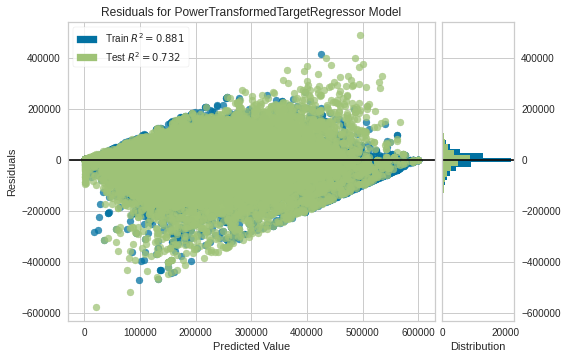

In [9]:
plot_model(rf)

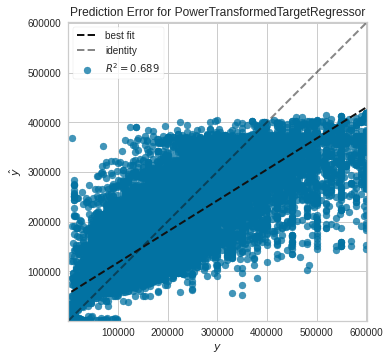

In [30]:
plot_model(tuned_rf, plot="error")

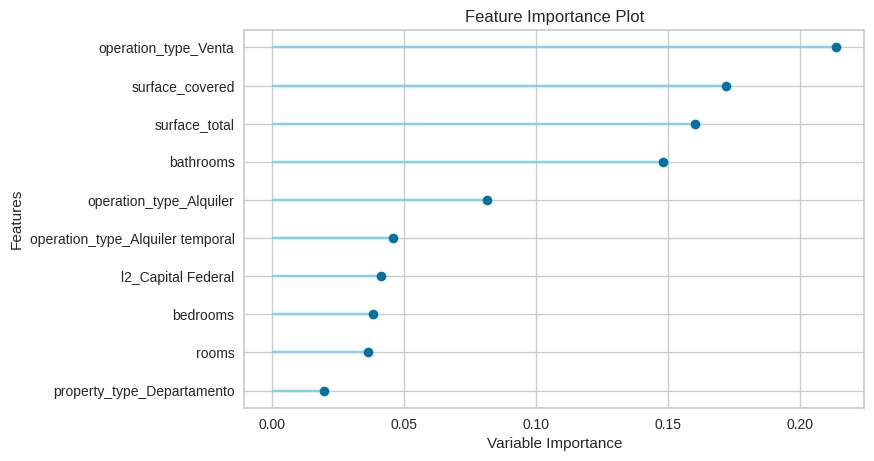

In [32]:
plot_model(tuned_rf, plot="feature")

### Light Gradient Boosting Machine

In [10]:
lgbm = create_model("lightgbm")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,44902.6235,4396310026.9597,66304.6758,0.6920,0.4078,0.3448
1,44955.3802,4424491625.0578,66516.8522,0.6936,0.4013,0.3526
2,46061.6901,4611452005.7141,67907.6727,0.6860,0.4164,0.3704
3,44924.9283,4521815343.5977,67244.4447,0.6885,0.4136,0.3788
4,46437.3120,4735519837.1067,68815.1134,0.6854,0.4093,0.3686
5,44038.1581,4232013430.3847,65053.9271,0.6945,0.4019,0.3479
6,44743.8180,4405343244.0256,66372.7598,0.7009,0.3994,0.3552
7,44182.9467,4375464525.0631,66147.2942,0.6964,0.3929,0.3428
8,46589.9168,4753616872.6356,68946.4783,0.6744,0.4083,0.3630
9,44411.8448,4486177209.5841,66978.9311,0.6870,0.3900,0.3313


In [14]:
tuned_lgbm = tune_model(lgbm, optimize="rmse", n_iter=100, search_library="optuna")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,43584.5958,4193661236.8461,64758.4839,0.7062,0.4013,0.3343
1,43269.7374,4161678325.2377,64511.0713,0.7118,0.3913,0.3380
2,44175.4855,4332617785.6551,65822.6237,0.7050,0.4071,0.3560
3,43458.5454,4286067478.7721,65468.0646,0.7047,0.4089,0.3696
4,44569.7605,4402581070.3349,66351.9485,0.7075,0.3962,0.3453
5,42577.3176,3990793748.5751,63172.7295,0.7119,0.3907,0.3318
6,43208.8774,4185580277.7668,64696.0608,0.7159,0.3882,0.3371
7,42703.8085,4158885040.2919,64489.4180,0.7115,0.3823,0.3275
8,44814.1161,4437118988.5615,66611.7031,0.6961,0.3983,0.3481
9,42895.4549,4276249079.2619,65393.0354,0.7016,0.3851,0.3236


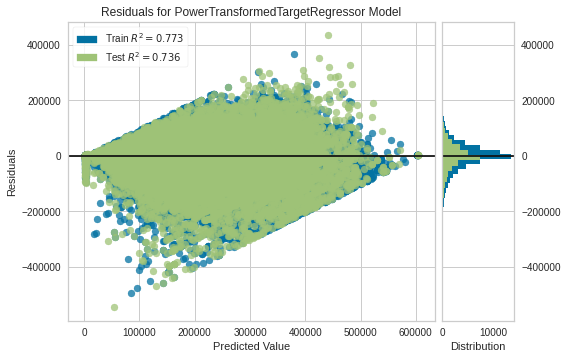

In [36]:
plot_model(tuned_lgbm)

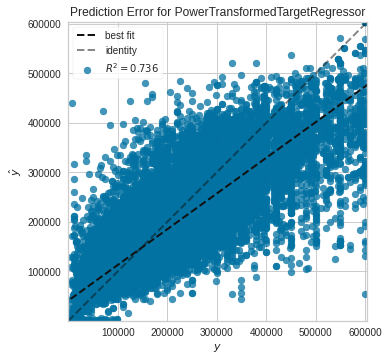

In [35]:
plot_model(tuned_lgbm, plot="error")

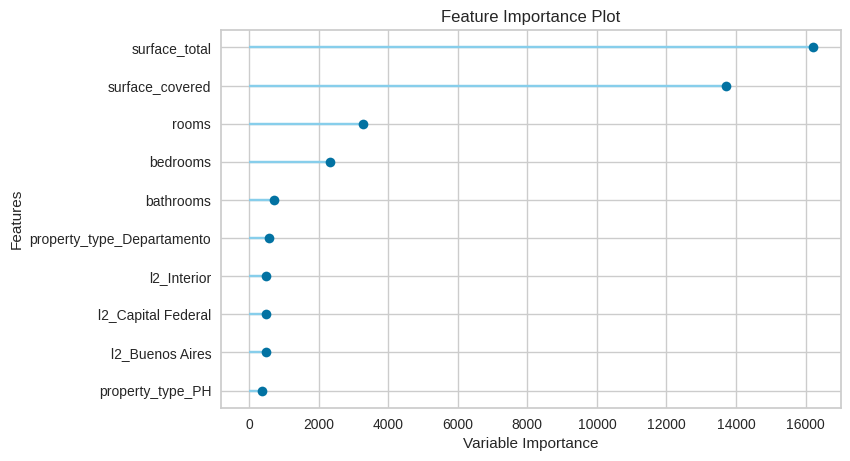

In [37]:
plot_model(tuned_lgbm, plot="feature")

### Extra Tree Regressor

In [17]:
et = create_model("et")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,42743.0661,4633709338.2160,68071.3548,0.6754,0.4214,0.3338
1,41719.4507,4425445876.0549,66524.0248,0.6936,0.4079,0.3421
2,43180.3711,4798661752.0854,69272.3737,0.6733,0.4279,0.3543
3,42414.0919,4713739255.0634,68656.6767,0.6752,0.4240,0.3704
4,43519.1368,4857062418.7999,69692.6282,0.6773,0.4111,0.3386
5,42405.3143,4560623579.2051,67532.3891,0.6708,0.4097,0.3310
6,42845.2421,4650851912.7663,68197.1547,0.6843,0.4052,0.3391
7,42002.3015,4528025011.3033,67290.6012,0.6859,0.4024,0.3304
8,43107.0877,4693606815.6869,68509.9030,0.6785,0.4173,0.3467
9,42438.2975,4736901279.0357,68825.1500,0.6695,0.4202,0.3423


In [18]:
tuned_et = tune_model(et, optimize="rmse", n_iter=20)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,50709.4690,5539336447.1435,74426.7186,0.6119,0.4520,0.4156
1,50546.4529,5537196589.8642,74412.3417,0.6166,0.4507,0.4267
2,50999.5473,5698720071.0818,75489.8673,0.6120,0.4616,0.4403
3,50113.7012,5490985363.8796,74101.1833,0.6217,0.4637,0.4535
4,52698.1237,5989467155.0518,77391.6478,0.6021,0.4606,0.4438
5,49230.0597,5219027472.5083,72242.8368,0.6233,0.4471,0.4177
6,50648.9215,5557634162.1876,74549.5417,0.6227,0.4491,0.4256
7,49964.1740,5528009980.6498,74350.5883,0.6165,0.4381,0.4091
8,52076.1396,5923960324.3463,76967.2679,0.5942,0.4638,0.4390
9,50186.1535,5606885742.3292,74879.1409,0.6088,0.4420,0.4074


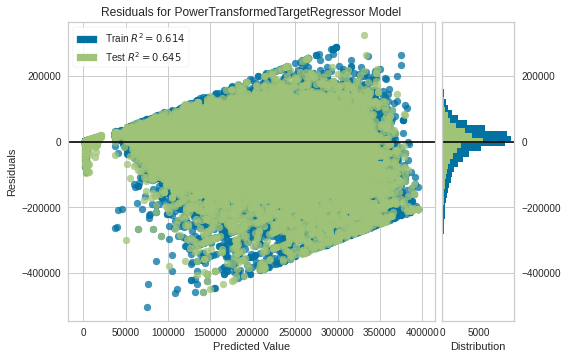

In [38]:
plot_model(tuned_et)

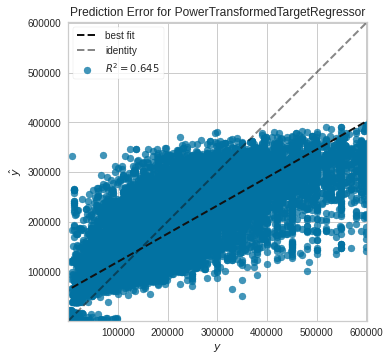

In [39]:
plot_model(tuned_et, plot="error")

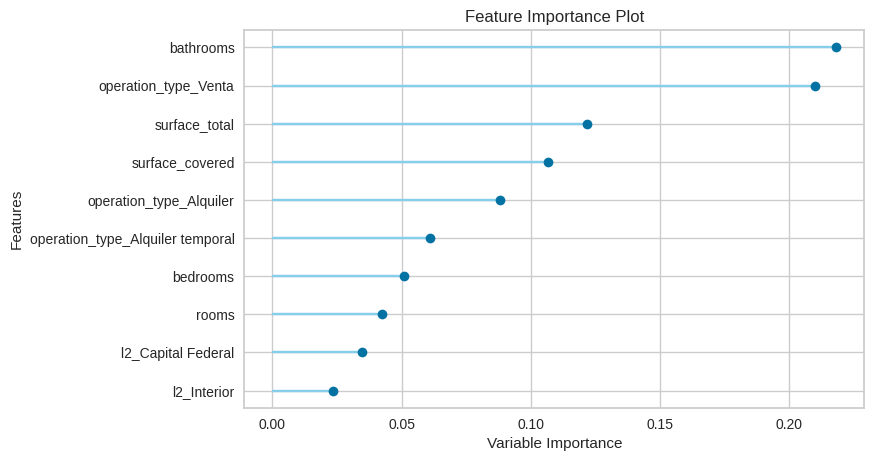

In [53]:
plot_model(tuned_et, plot="feature")

### Multi Layer Perceptron

In [19]:
mlp = create_model("mlp")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,45302.1136,4502450795.4423,67100.3040,0.6846,0.4180,0.3502
1,45916.3528,4506169338.3620,67128.0071,0.6880,0.4225,0.3948
2,46321.4859,4741356632.0896,68857.5096,0.6772,0.4212,0.3680
3,45424.8882,4570108223.0462,67602.5756,0.6851,0.4282,0.3956
4,47111.9276,4928723548.2406,70204.8684,0.6726,0.4244,0.3766
5,44514.8728,4403604947.7276,66359.6636,0.6822,0.4297,0.3491
6,45821.4553,4540264428.6789,67381.4843,0.6918,0.4106,0.3754
7,44683.3039,4544345625.4815,67411.7618,0.6847,0.3966,0.3391
8,46969.8638,4902469018.8449,70017.6336,0.6642,0.4149,0.3638
9,44696.4231,4468763540.4810,66848.8111,0.6882,0.3959,0.3449


In [21]:
tuned_mlp = tune_model(mlp, optimize="rmse", n_iter=20)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,44338.4283,4330302564.0208,65805.0345,0.6966,0.4159,0.3574
1,45614.4901,4676687422.0583,68386.3102,0.6762,0.4070,0.3467
2,46262.2846,4725933909.5379,68745.4283,0.6782,0.4321,0.3727
3,45381.5991,4630267447.3220,68046.0686,0.6810,0.4260,0.3876
4,46662.8253,4745956355.5270,68890.9018,0.6847,0.4228,0.3753
5,44603.1979,4429806906.9878,66556.7946,0.6803,0.4249,0.3558
6,45326.4747,4514567945.0027,67190.5346,0.6935,0.4340,0.3875
7,45135.1089,4547613890.5780,67435.9985,0.6845,0.4230,0.3757
8,46815.9321,4856142690.5943,69686.0294,0.6673,0.4282,0.3860
9,44382.4298,4517556180.0905,67212.7680,0.6848,0.4192,0.3909


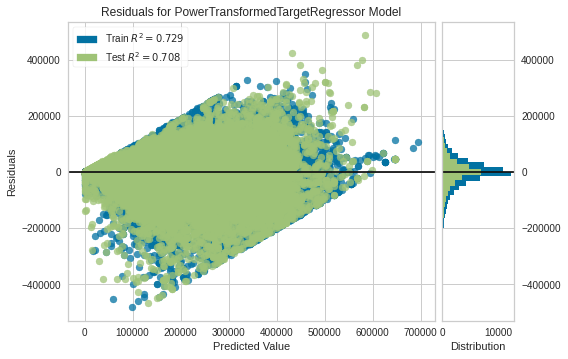

In [40]:
plot_model(tuned_mlp)

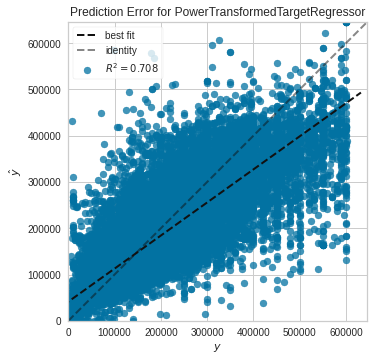

In [23]:
plot_model(tuned_mlp, "error")

### Blending models

In [24]:
blending = blend_models(estimator_list=[lgbm, rf, et], optimize="rmse")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,41908.0022,4073726093.0977,63825.7479,0.7146,0.3971,0.3240
1,41585.5588,3979930369.5211,63086.6893,0.7244,0.3877,0.3299
2,42846.6887,4257975730.0053,65253.1664,0.7101,0.4053,0.3484
3,41750.4244,4186883208.6144,64706.1296,0.7115,0.4033,0.3585
4,42922.0681,4277125715.6307,65399.7379,0.7159,0.3918,0.3342
5,41447.8586,3960360243.0230,62931.3931,0.7141,0.3885,0.3231
6,42058.1826,4104245449.3287,64064.3852,0.7214,0.3846,0.3307
7,41255.3031,4034357651.4576,63516.5935,0.7201,0.3810,0.3219
8,43087.8858,4265463223.8234,65310.5139,0.7078,0.3969,0.3394
9,41516.1085,4169821192.5417,64574.1527,0.7091,0.3893,0.3227


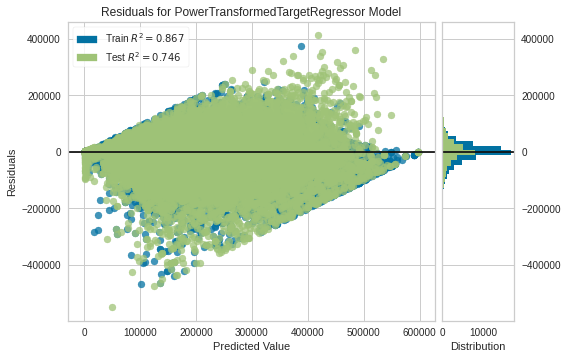

In [44]:
plot_model(blending)

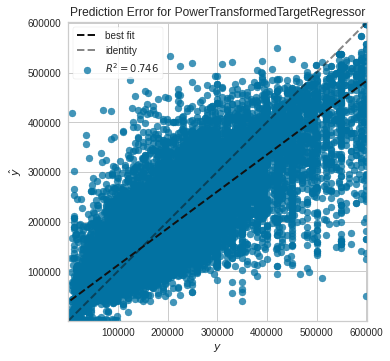

In [45]:
plot_model(blending, plot="error")

### Stacking models

In [25]:
stacking = stack_models(estimator_list=[lgbm, rf, et], optimize="rmse")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,42355.4634,4035144096.4509,63522.7841,0.7173,0.3950,0.3244
1,42174.1454,3980496198.5046,63091.1737,0.7244,0.3858,0.3305
2,43360.6742,4221916475.4838,64976.2763,0.7125,0.4033,0.3494
3,42250.7198,4157748537.6147,64480.6059,0.7135,0.4011,0.3583
4,43597.6215,4273291073.9929,65370.4144,0.7161,0.3912,0.3379
5,41746.2876,3908143806.2086,62515.1486,0.7179,0.3870,0.3238
6,42375.3643,4056943091.0208,63694.1370,0.7246,0.3826,0.3321
7,41687.0426,4011368653.1523,63335.3665,0.7217,0.3783,0.3221
8,43746.0098,4277639077.9921,65403.6626,0.7070,0.3943,0.3403
9,41883.9215,4125430728.5718,64229.5160,0.7122,0.3825,0.3163


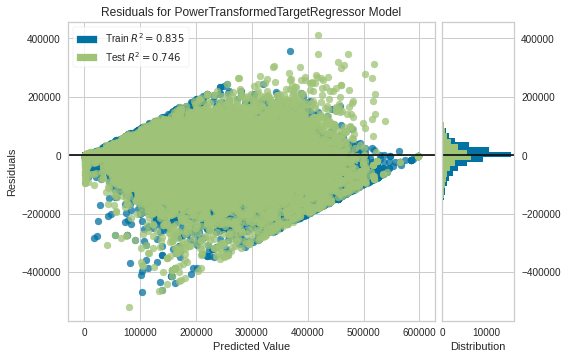

In [49]:
plot_model(stacking)

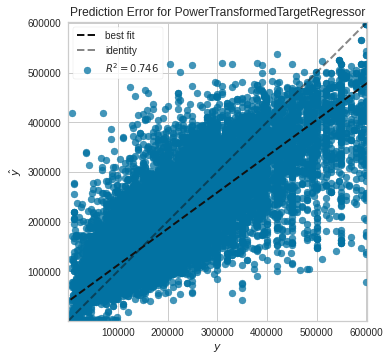

In [50]:
plot_model(stacking, plot="error")

### Best model

**automl** function returns the best model out of all trained models in current session based on the "optimize" parameter. 

In [26]:
best_model = automl(optimize="RMSE")

In [46]:
best_model

PowerTransformedTargetRegressor(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                                estimators=[('lightgbm',
                                             LGBMRegressor(boosting_type='gbdt',
                                                           class_weight=None,
                                                           colsample_bytree=1.0,
                                                           importance_type='split',
                                                           learning_rate=0.1,
                                                           max_depth=-1,
                                                           min_child_samples=20,
                                                           min_child_weight=0.001,
                                                           min_split_gain=0.0,
                                                           n_estimators=100,
                                                           

In [51]:
preds = predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,40033.8881,3840839046.8541,61974.5032,0.7465,0.4152,0.3342


## Finalize model for deployment

In [52]:
final_model = finalize_model(best_model)

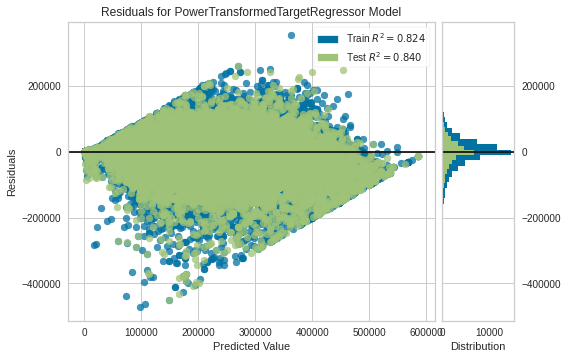

In [56]:
plot_model(final_model)

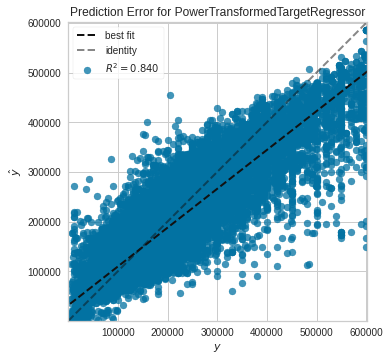

In [57]:
plot_model(final_model, "error")

## Conclusion

Through a series of experiments that constitute the pipeline proposed by the pycaret library, it was possible to build different models, evaluate them and choose the best one. It was possible to obtain a model that allows to predict the value of real estate properties with very good metrics.